## Detecting patterns of speciation in the fossil record

In this assignment, we use data from the NOW (New and Old Worlds) database of fossil mammals to study patterns of speciation over time and space. In particular, we are interested to know when and where speciation rates have been significantly high. The task is to find which time periods and which places over the history of mammals have given rise to exceptionally high numbers of new species. 
The phenomenon is known in the evolutionary literature as the "species factory". 
Palaeontologists are interested why and in which ways those times and places are special. 
The role of computational science is to identify and characterize such times and places.
We practice using pandas DataFrames, performing logistic regression and making statistical significance tests in data analysis.


### 1.1 Fossil data and the NOW database

Fossils are remains, traces or impressions of organisms that lived in the past, preserved in rocks. The NOW fossil mammal database contains global in- formation about Cenozoic land mammal taxa (identifications of animals and their ancestral relationships to other animals) and localities (places on Earth where fossils are found). 
Cenozoic is the era that extends from 66 million years ago to the present day, that is, a time interval starting right after dinosaurs went extinct. Cenozoic is known as the Age of Mammals, because the extinction of many groups, including dinosaurs, allowed mammals to greatly
diversify. The continents also moved into their current positions during this era.

The NOW database has been curated in Helsinki since 1993. The database keeps a record of global mammal fossil finds: it records geographic localities where mammalian fossils have been found around the world and for each locality there is a list of species that have been found there. 

The database includes an estimated age for each fossil locality. 
Information about fossil mammal species, characteristics of their appearance, behaviour and ways of
life is also available. The data is free and open to use for anyone.
The database has been compiled over many years from information given in publications and from personal knowledge of domain experts. The database is alive, meaning that data is continuously updated and expanded to incorporate new discoveries. The database is curated by an international team of experts. 
However, fossil data is inherently uncertain. Taxonomic assignments as well as age estimates rely on opinions and interpretations of human experts.

There are different ways to estimate the age of a fossil. Typically, the age is assigned based on the age of the locality at which the fossil was found. One method to do this is through radiometric dating. This relies on the speed of radioactive decay of chemical elements and can tell age very precisely. The main challenge is that the sample must have remained a closed system, for instance, due to a volcanic eruption, since the event being dated. 
Some continents and some time periods offer more possibilities for radiometric dating than others. The African fossil record, for instance, is quite well interleaved with volcanic layers, while the European fossil record { not so much. In the absence of other possibilities, relative dating is used to get age estimates. This technique relies on common biological events, such as first and last occurrences of selected indicator species. 

Such dating is called biochronology:
the age of a locality is estimated by comparing the faunal composition of the locality to known reference localities, for which exact ages are known via radiometric dating. Mammal Neogene (MN) time zones in Europe is a set of such relative dating units. We will use those units in this analysis.
Global compilations of fossil data can be used for different types of analyses of the history of life, evolutionary processes and environmental contexts. The goal is not only to repicture ecosystems of the past from a highly fragmented record, but more so to reconstruct processes and drivers of changes in those ecosystems. The fundamental question that can be asked of such data is how
life on Earth works.



### 1.2 Data preprocessing

This exercise will focus on analysis of how new species appear and how those patterns manifest in space and time. We will work with time intervals corresponding to the European MN zones. 
As part of the data preprocessing exercise we will need to map Asian and African fossil localities to these same units, so that we are working with one unified time frame.
The next steps will guide you through preprocessing data before proceeding to computational analysis.


Exercise 1. <br>Download data from the NOW database. 
Go to http://www.helsinki.fi/science/now/
Click "View Database", then "Enter Database", then "Locality" and then "Export". 
Select "include species lists" and choose "Comma" for field separator. 
Then, click "All NOW localities". 
Once download completes, copy all of the text on your browser and paste it into a new txt file. Save
the fle. Once we have all of the raw data, we need to transform it into a more useful format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Exercise 1. 
data = pd.read_csv('temp.txt')
data.describe()

,LIDNUM,LAT,LONG,MAX_AGE,MIN_AGE,SIDNUM
count,68654.000000,68654.000000,68654.000000,68654.000000,68654.000000,68654.000000
mean,20437.271798,35.208998,-5.850955,15.670123,14.056280,39934.555190
std,6411.980920,17.518510,68.280453,15.370565,15.108975,25718.196334
min,10001.000000,-64.225500,-134.183333,0.011500,0.000000,20000.000000
25%,11100.000000,34.323333,-82.427500,5.000000,3.500000,21302.000000
50%,21433.000000,41.125560,7.611946,11.200000,9.900000,25565.000000
75%,24796.000000,45.250000,34.066667,17.500000,16.400000,80241.000000
max,28763.000000,80.166667,169.811398,66.000000,64.800000,85359.000000


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 85 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LIDNUM                 68654 non-null  int64  
 1   NAME                   68654 non-null  object 
 2   LATSTR                 68654 non-null  object 
 3   LONGSTR                68654 non-null  object 
 4   LAT                    68654 non-null  float64
 5   LONG                   68654 non-null  float64
 6   MAX_AGE                68654 non-null  float64
 7   BFA_MAX                68654 non-null  object 
 8   BFA_MAX_ABS            68654 non-null  object 
 9   FRAC_MAX               68654 non-null  object 
 10  MIN_AGE                68654 non-null  float64
 11  BFA_MIN                68654 non-null  object 
 12  BFA_MIN_ABS            68654 non-null  object 
 13  FRAC_MIN               68654 non-null  object 
 14  CHRON                  68654 non-null  object 
 15  AG

Exercise 2. <br>
Create a pandas DataFrame that contains all of the data and save it as a csv file. How many rows does the DataFrame contain?

In the DataFrame, each row represents one fossil occurrence. 
The columns LONG and LAT give the longitude and latitude, respectively, of where a given fossil occurrence was found. 
The columns MIN AGE and MAX AGE give an estimation of the age of the fossil (in millions of years). The column LIDNUM contains a unique identification number for each locality, where fossils have
been found. 
The columns GENUS and SPECIES give information on the taxonomic identification of the fossil.

The modern modular system of naming organisms was invented by Carl Linnaeus in the 18th century. 
This system is exclusively used today. Within the scope of this exercise, it is important to know that a species is uniquely identified by a combination of the above two taxonomic ranks: genus and
species. Neither rank alone uniquely defines a species, but their combination is suficient. As a side note, a species name should always be written in italics, for example Canis lupus (the gray wolf), where Canis is the genus and lupus is the species.

Before we can begin to analyze the data properly, a number of cleaning and preprocessing steps are necessary.

In [111]:
#Exercise 2. 
data.to_csv('data.csv')
data.shape
print("The number of rows in dataset is {}\n".format(data.shape[0]))

The number of rows in dataset is 68654



Exercise 3. 
a) Remove all rows where LAT = LONG = 0; these occurrences have incorrect coordinates. Drop rows where SPECIES is "sp." or "indet."; these occurrences have not been properly identified.

In [2]:
#Exercise 3. a)
df = data.drop(data[(data['LAT'] == 0) & (data['LONG'] == 0)].index)
print("After remove all rows LAT=LONG =0, data shape is {}".format(df.shape))
df = df.drop(df[(df['SPECIES'] == 'sp.') | (df['SPECIES'] == 'indet.') ].index)
df.shape
print("After remove all rows where SPECIES is 'sp.' or 'indet.', data shape is {}".format(df.shape))

After remove all rows LAT=LONG =0, data shape is (68648, 85)
After remove all rows where SPECIES is 'sp.' or 'indet.', data shape is (48600, 85)


b) Next we will assign each occurrence to a specific Mammal Neogene (MN) time unit. 
Table 1 shows the time boundaries of each time unit.
Assign each occurrence to a correct time unit by calculating the mean of MIN AGE and MAX AGE. 
If the mean age of an occurrence is precisely on the boundary between two time units, assign the occurrence to the older time unit. 
If the mean age of an occurrence is outside of the MN time interval, assign it to a "pre-MN" or "post-MN" category.

In [8]:
#Exercise 3. b)
def get_MN_timeunit(x):
    name = ""
    if (x < 0.01):
        name = 'post-MN'
    elif (x >= 0.01 and x < 0.85):
        name = 'MQ19'
    elif (x >= 0.85 and x < 1.9):
        name = 'MQ18'
    elif (x >= 1.9 and x < 2.5):
        name = 'MN17'
    elif (x >= 2.5 and x < 3.55):
        name = 'MN16'
    elif (x >= 3.55 and x < 5):
        name = 'MN15'
    elif (x >= 5 and x < 5.3):
        name = 'MN14'
    elif (x >= 5.3 and x < 7.1):
        name = 'MN13'
    elif (x >= 7.1 and x < 7.6):
        name = 'MN12'
    elif (x >= 7.6 and x < 8.9):
        name = 'MN11'
    elif (x >= 8.9 and x < 9.9):
        name = 'MN10'
    elif (x >= 9.9 and x < 11.2):
        name = 'MN9'
    elif (x >= 11.2 and x < 12.85):
        name = 'MN7-8'
    elif (x >= 12.85 and x < 14.2):
        name = 'MN6'
    elif (x >= 14.2 and x < 16.4):
        name = 'MN5'
    elif (x >= 16.4 and x < 17.2):
        name = 'MN4'
    elif (x >= 17.2 and x < 19.5):
        name = 'MN3'
    elif (x >= 19.5 and x < 21.7):
        name = 'MN2'
    elif (x >= 21.7 and x < 23):
        name = 'MN1'
    else:
        name = 'pre-MN'
        
    return name

df['MEAN_AGE'] =(df['MAX_AGE'] + df['MIN_AGE']) /2
df['MEAN_AGE'].isnull().any() 
df['MN_TIME'] = df.apply(lambda x: get_MN_timeunit(x['MEAN_AGE']), axis=1)
df.head()

,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,MAX_AGE,BFA_MAX,BFA_MAX_ABS,FRAC_MAX,...,DIET_2,DIET_3,LOCOMO1,LOCOMO2,LOCOMO3,SPCOMMENT,SYNONYMS,MEAN_AGE,MN_TIME,Unique_ID
0,21390,Aarau,47 23 0 N,8 3 0 E,47.383000,8.050000,14.2000,mn6,\N,\N,...,\N,\N,\N,\N,\N,\N,\N,13.5250,MN6,0
2,27232,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,...,herbivore,graze,te,surficial,gen_quad,\N,Rhinoceros tichorhinus,0.0265,MQ19,1
3,27232,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,...,herbivore,\N,te,\N,\N,\N,\N,0.0265,MQ19,2
5,27232,Aba_zawei,33 15 00 N,102 25 00 E,33.250000,102.416667,0.0295,\N,C14,\N,...,herbivore,\N,te,\N,\N,\N,\N,0.0265,MQ19,3
7,27955,Abengibre,39 12 35 N,1 32 39 W,39.209991,-1.544182,5.0000,mn15,\N,\N,...,herbivore,\N,\N,\N,\N,\N,\N,4.2750,MN15,4


c) Sometimes expert knowledge may be used to override some of the information recorded in the data. In our case, experts in palaeontology tell us that occurrences in the localities
"Samos Main Bone Beds" and "Can Llobateres I" should be assigned to time units MN12 and MN9, respectively. 

Check these and if necessary, edit the time units to their correct values.



In [9]:
#Exercise 3. c)
count1 = df[(df['NAME'] == 'Samos Main Bone Beds') & (df['MN_TIME'] != 'MN12')].count()[0]
count2 = df[(df['NAME'] == 'Can Llobateres 1') & (df['MN_TIME'] != 'MN9')].count()[0]
print("Number of data, assigned to other time unit of \n'Samos Main Bone Beds' is {} \n'Can Llobateres I' is {}".format(count1, count2))

#set value as MN9
df.loc[df.NAME == 'Can Llobateres 1', 'MN_TIME'] = 'MN9'

print("After correction, number of data, assigned wrongly 'Can Llobateres 1' is {}\n".format(df[(df['NAME'] == 'Can Llobateres 1') & (df['MN_TIME'] != 'MN9')].count()[0]))
df[(df['NAME'] == 'Can Llobateres 1')].head(3)


Number of data, assigned to other time unit of 
'Samos Main Bone Beds' is 0 
'Can Llobateres I' is 76
After correction, number of data, assigned wrongly 'Can Llobateres 1' is 0



,LIDNUM,NAME,LATSTR,LONGSTR,LAT,LONG,MAX_AGE,BFA_MAX,BFA_MAX_ABS,FRAC_MAX,...,DIET_2,DIET_3,LOCOMO1,LOCOMO2,LOCOMO3,SPCOMMENT,SYNONYMS,MEAN_AGE,MN_TIME,Unique_ID
7228,20020,Can Llobateres 1,41 31 57 N,2 8 12 E,41.532663,2.13691,9.786,c4ar.3r,\N,\N,...,carnivore,m/bone,te,surficial,gen_quad,\N,\N,9.7535,MN9,758
7229,20020,Can Llobateres 1,41 31 57 N,2 8 12 E,41.532663,2.13691,9.786,c4ar.3r,\N,\N,...,carnivore,meat_only,te,surficial,gen_quad,\N,Sansanosmilus jourdani,9.7535,MN9,898
7230,20020,Can Llobateres 1,41 31 57 N,2 8 12 E,41.532663,2.13691,9.786,c4ar.3r,\N,\N,...,omnivore,plant_dom,te,surficial,gen_quad,\N,\N,9.7535,MN9,2182


d) We need to be able to identify all occurrences of each species. 
<br>Assign a unique identification number for each unique combination of GENUS and SPECIES. 
<Br>Create a new column in the DataFrame and label each occurrence with a corresponding species identification number.

In [10]:
#Exercise 3. d)
df.groupby(['SPECIES']).count() # 5755
df.groupby(['GENUS']).count()   #3476

df['Unique_ID'] = pd.factorize(df.GENUS + df.SPECIES)[0]
df.groupby(['Unique_ID']).count()  # =9707
df.shape

#df1 = df[['GENUS','SPECIES']].drop_duplicates()  #9707 rows × 3 columns
#df1['Unique_ID'] = range(len(df1.index))
#df1['NEW_NAME'] = df1.GENUS +";" + df.SPECIES
#df2 = df.groupby(['GENUS', 'SPECIES']).size().reset_index()

#df = df[['a','b']].apply(lambda x: x.str.lower()).drop_duplicates()
#df[['a','b']] = df[['a','b']].apply(lambda x: x.str.lower())
#df1.groupby(['A','B']).size().reset_index().rename(columns={0:'count'})


(48600, 88)

e) Each locality should contain no more than one occurrence of any species. 
Check whether this is the case and remove duplicate copies, if necessary.

f) How many rows are we left with in the DataFrame (compare with exercise 2)? 
How many unique species and localities are identified?

In [11]:
#Exercise 3. e, f)
df.groupby(['SPECIES']).count() # 5755
df.groupby(['LIDNUM']).count()  #5373
df.groupby(['SPECIES','LIDNUM']).count() # 46669

DX = df.drop_duplicates(['LIDNUM','SPECIES'], keep='first')
DX.shape

print("After removement of duplicate copies based on the locality and species is {}\n".format(DX.shape[0]))
print("e) {} rows are left compared with exercise 2({}).".format(DX.shape[0], data.shape[0]))
print("f) How many unique species and localities are identified? {}.".format(DX.shape[0]))

After removement of duplicate copies based on the locality and species is 46669

e) 46669 rows are left compared with exercise 2(68654).
f) How many unique species and localities are identified? 46669.


### 1.3 Occurrences
For each species in our dataset, we can determine the time unit when that species is first observed in the fossil record within our study area. We refer to all of the occurrences of a given species in the oldest time unit it is observed in as first occurrences.
Then, we can translate our interest in high speciation rates into detecting when and where we observe a lot of first occurrences.

Exercise 4. 
<Br>Create a DataFrame that shows for each species how many occurrences it has in each time unit. 
<br>Then, create a different DataFrame that shows for each species the time unit when it is first observed (i.e.the oldest time unit). 
<br>For each time unit, calculate the proportion of first occurrences to all occurrences. 
<br>Plot the proportion of first occurrences over time. Also, plot the total number of occurrences over time.

In [12]:
df = DX
#Exercise 4.
df_Species_TimeUnit = df.groupby(['SPECIES','MN_TIME']).size().reset_index().rename(columns={0:'Occurrences'})
df_Species_TimeUnit

,SPECIES,MN_TIME,Occurrences
0,Guangpui,MN3,1
1,Palaeogracilis,MQ18,1
2,Petaurista,MQ18,1
3,Zhaii,pre-MN,1
4,"\""hypohippoides\""",MN3,1
...,...,...,...
12314,zygomaticus,MN5,14
12315,zygomaticus,MN6,5
12316,zygomaticus,pre-MN,2
12317,zygus,pre-MN,1


In [13]:
df_temp = df.groupby(['SPECIES','MN_TIME']).MEAN_AGE.max().reset_index()
df_temp_ = df_temp.groupby(['SPECIES']).MEAN_AGE.max().reset_index()

df_Species_Oldest_TimeUnit = df_temp_.merge(df_temp, how='inner', left_on=['SPECIES','MEAN_AGE'], right_on=['SPECIES','MEAN_AGE'])
df_Species_Oldest_TimeUnit

,SPECIES,MEAN_AGE,MN_TIME
0,Guangpui,18.889000,MN3
1,Palaeogracilis,0.955900,MQ18
2,Petaurista,0.939206,MQ18
3,Zhaii,51.900000,pre-MN
4,"\""hypohippoides\""",18.205000,MN3
...,...,...,...
5750,zouavei,8.250000,MN11
5751,zygeus,60.400000,pre-MN
5752,zygomaticus,31.700000,pre-MN
5753,zygus,61.100000,pre-MN


In [16]:
df_first = df_Species_Oldest_TimeUnit.groupby(['MN_TIME']).size().reset_index().rename(columns={0:'count_first'})
df_total = df_Species_TimeUnit.groupby(['MN_TIME']).Occurrences.sum().reset_index()
df_total = df_total.rename(columns={'Occurrences':'count_total'})
print(df_total['count_total'].sum(), df_first['count_first'].sum())

df_proportion_first = df_first.merge(df_total, how = 'inner', left_on =['MN_TIME'], right_on = ['MN_TIME'])
df_proportion_first['Proportion'] = df_proportion_first['count_first'] / df_proportion_first['count_total']

df_proportion_first

46669 5755


,MN_TIME,count_first,count_total,Proportion
0,MN1,43,179,0.240223
1,MN10,141,1463,0.096377
2,MN11,162,1502,0.107856
3,MN12,126,1756,0.071754
4,MN13,286,2595,0.110212
5,MN14,105,773,0.135834
6,MN15,385,2723,0.141388
7,MN16,221,2059,0.107334
8,MN17,148,1656,0.089372
9,MN2,211,1119,0.188561


Text(0.5, 1.0, 'Total occurrences in each time unit')

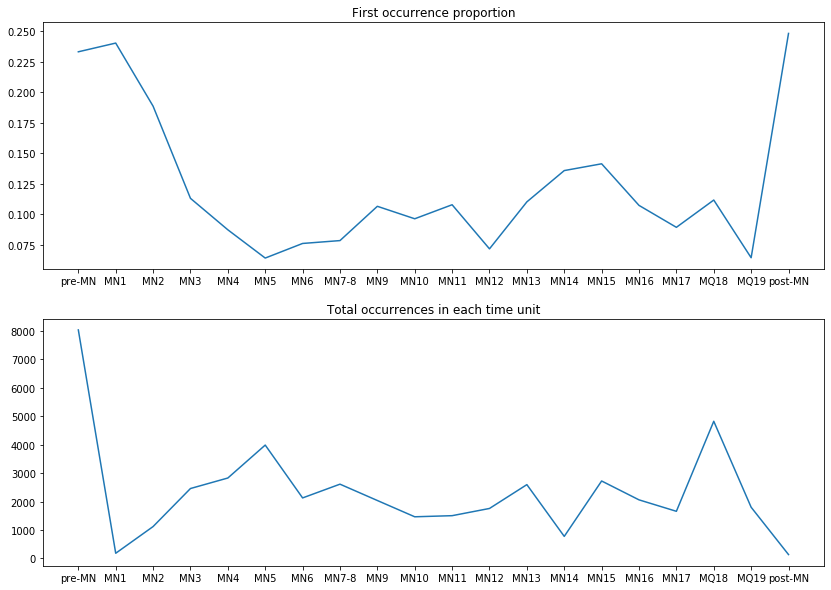

In [17]:
df_proportion_first['MN_TIME'] = pd.Categorical(df_proportion_first['MN_TIME'], ['pre-MN','MN1', 'MN2', 'MN3', 'MN4', 'MN5', 'MN6', 'MN7-8', 'MN9', 'MN10', 'MN11', 'MN12', 'MN13', 'MN14', 'MN15', 'MN16', 'MN17', 'MQ18', 'MQ19', 'post-MN'])
df_new = df_proportion_first.sort_values("MN_TIME")

fig, ax = plt.subplots(2, figsize=[14,10])
ax[0].plot(df_new['MN_TIME'], df_new['Proportion'])
ax[0].set_title('First occurrence proportion')
ax[1].plot(df_new['MN_TIME'], df_new['count_total'])
ax[1].set_title('Total occurrences in each time unit')


Next, we would like to look into geographic patterns in the data. A useful
library for plotting geographic data is geopandas (http://geopandas.org/).
To import a world map, use the following code:


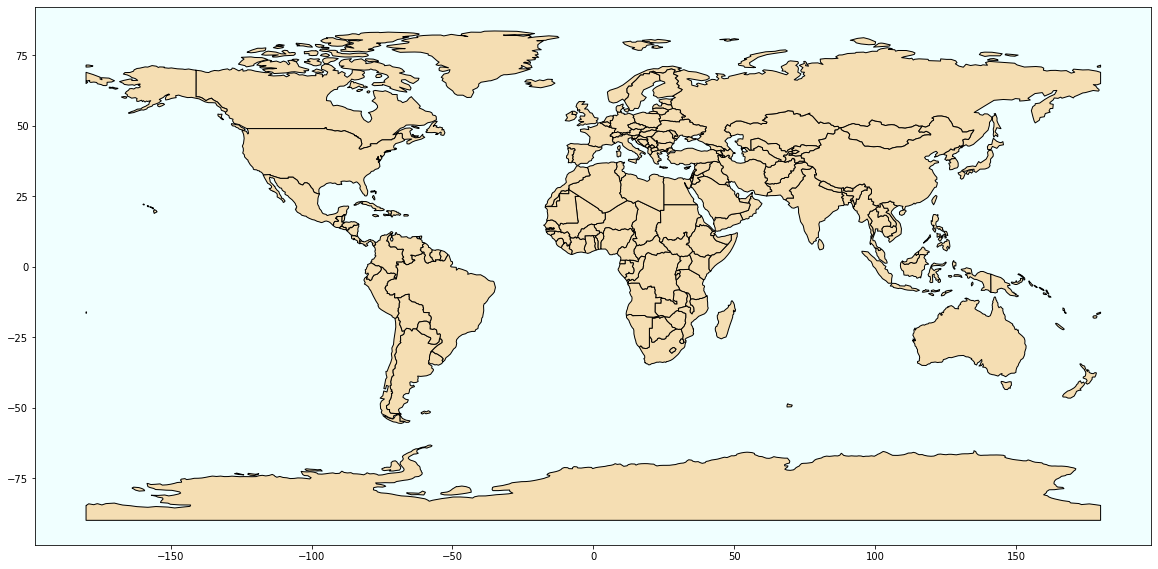

In [18]:
import geopandas
world = (geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')))

fig, ax = plt.subplots(figsize=(20,10))
world.plot(ax=ax, color='wheat', edgecolor='black')
ax.set_facecolor('azure') 


Exercise 5. 
<Br>
a) Create a DataFrame that collects the following information for every locality: locality number (LIDNUM), longitude, latitude, time unit, number of first occurrences in the locality, number of all occurrences in the locality and proportion of first occurrences in the locality.<br>
Note, you should use LIDNUM to identify unique localities and not the NAME variable (why?).
<Br>
    

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df5 = pd.read_csv('df5.csv')
df5_g = df5.groupby(['LIDNUM','LAT','LONG', 'MN_TIME']).size().reset_index().rename(columns={0:'count_total'})
df5_g             
df6 = pd.read_csv('df6.csv')
df5_g1 = df6

In [145]:
#Exercise 5 a)

df5 = df[['LIDNUM','NAME','GENUS','SPECIES','LAT','LONG','MEAN_AGE','MN_TIME', 'Unique_ID']]
print(df5.shape)
df5_g = df5.groupby(['LIDNUM','LAT','LONG', 'MN_TIME']).size().reset_index().rename(columns={0:'count_total'})
df5_g

(46669, 9)


,LIDNUM,LAT,LONG,MN_TIME,count_total
0,10001,19.433330,-99.133333,MN2,1
1,10002,16.898056,-96.414167,MN3,3
2,10003,17.050000,-96.716667,MN5,1
3,10004,17.050000,-96.716667,MN5,8
4,10005,17.050000,-96.716667,MN6,1
...,...,...,...,...,...
5368,28759,41.535495,1.800018,MN9,7
5369,28760,47.137222,15.348889,MN7-8,19
5370,28761,11.481515,40.510824,MN15,7
5371,28762,11.513429,40.515810,MN15,12


In [2]:
df5_temp = df5.groupby(['LIDNUM','MN_TIME','SPECIES']).MEAN_AGE.max().reset_index()
df5_temp1 = df5_temp.merge(df_Species_Oldest_TimeUnit, how='inner', left_on=['SPECIES','MN_TIME','MEAN_AGE'], right_on =['SPECIES','MN_TIME','MEAN_AGE'])
df5_temp2 = df5_temp1.groupby(['LIDNUM']).size().reset_index().rename(columns={0:'count_first'})

df5_g1 = df5_g.merge(df5_temp2, how="outer", left_on = ['LIDNUM'], right_on =['LIDNUM'])
df5_g1.fillna(0, inplace = True)
df5_g1['proportion'] = df5_g1['count_first']/df5_g1['count_total']
df5_g1

NameError: name 'df_Species_Oldest_TimeUnit' is not defined

=> In data explanation part, cleary mentioned "The column LIDNUM contains a unique identification number for each locality", where fossils have been found. locality is identified with location (latitude and longitude pair), and each location has unique identifination number of LIDNUM not name.

b) Visualize the distribution of localities in space and time. For each time
unit, plot the LAT and LONG coordinates of each locality (corresponding
to the time unit). For example, you can use the above codes to create a
geographic map and then use a standard matplotlib scatter plot to add
the localities. Choose the marker size for each locality such that it is
relative to the number of occurrences in the locality (bigger markers for
bigger localities).

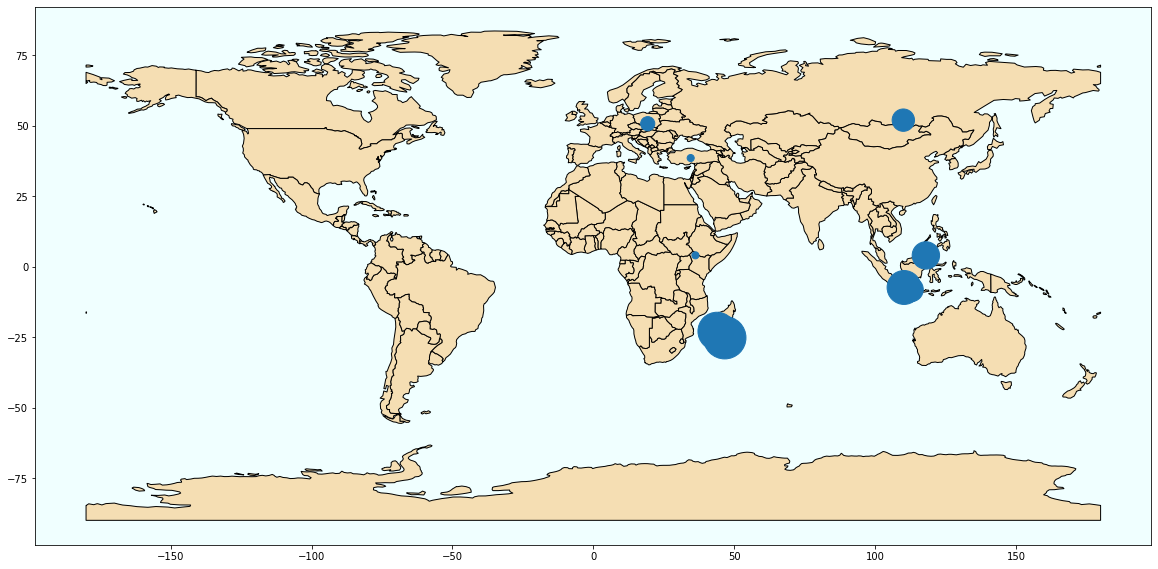

In [24]:
#Exercise 5 b)
import geopandas
world = (geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')))

def draw_timeunit_based(df, timeunit):
    import geopandas
    world = (geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')))
    df = df[df['MN_TIME'] == timeunit]
    fig, ax = plt.subplots(figsize=(20,10))
    world.plot(ax=ax, color='wheat', edgecolor='black')
    ax.set_facecolor('azure') 
    ax.scatter(df['LONG'], df['LAT'], s=df['count_total']*50)
    
draw_timeunit_based(df5_g1, 'post-MN')

c) Based on exercises 4 and 5, what kind of observations about sampling
can you make? Are there differences in sampling density over space and
time? Compare some basic sampling properties between Africa, Asia and
Europe, e.g. spatial coverage and average number of occurrences per
locality.


In [388]:
#Exercise 5 c)

### 1.4 Localities and sampling

One possible way to reduce noise in the fossil data is to spatially aggregate occurrences. By this we mean the following: instead of considering only the occurrences of a given locality, we consider all occurrences found in some geographic area around the focal locality (encompassing other fossil localities) to be representative of the fauna that lived in the area. After all, given the typical length of MN time units (around 1 million years) and the mobility of large mammals, it is reasonable to assume that occurrences in nearby localities should also be re ected in our estimation of the faunal composition
of the focal locality.

The number of first occurrences observed in a given time and place is dependant on how well that area was sampled in previous time units. For example, we would expect to find more first occurrences in an area that was poorly sampled in the preceding time unit, because it is more likely that we simply do not have observations of some species in the previous time unit that
nevertheless existed then.

A general challenge with fossil data is that it suffers from a sampling bias, i.e. sampling is uneven in space and time. 
Then, it is not very informative to simply look when and where you find most first occurrences, because the number of first occurrences is correlated with the total number of occurrences in a given time and area (which reects sampling bias).


Next, we will measure sampling density for each locality as the number of occurrences observed in a given area around that locality in the preceding time unit. We will also collect occurrence statistics for that same area in the time unit of the locality. These statistics will later be used to estimate statistical significance of the observed number of first occurrences.







Exercise 6. 
<Br>For each locality, look at a ten by ten degrees area (in latitude and longitude) centered around the locality.
<br>Record the total number of occurrences and total number of first occurrences found within that square in the time unit corresponding to the focal locality. 
<br>Also, record the total number of occurrences within that square in the preceding time unit (relative to the focal locality). 
<br>Record these numbers into the DataFrame that was created in exercise 5 (add new columns).


In [147]:
df5.to_csv('df5.csv')
df6 = df5_g1

df6.to_csv('df6.csv')
df6

,LIDNUM,LAT,LONG,MN_TIME,count_total,count_first,proportion
0,10001,19.433330,-99.133333,MN2,1,0.0,0.000000
1,10002,16.898056,-96.414167,MN3,3,1.0,0.333333
2,10003,17.050000,-96.716667,MN5,1,0.0,0.000000
3,10004,17.050000,-96.716667,MN5,8,4.0,0.500000
4,10005,17.050000,-96.716667,MN6,1,0.0,0.000000
...,...,...,...,...,...,...,...
5368,28759,41.535495,1.800018,MN9,7,0.0,0.000000
5369,28760,47.137222,15.348889,MN7-8,19,4.0,0.210526
5370,28761,11.481515,40.510824,MN15,7,2.0,0.285714
5371,28762,11.513429,40.515810,MN15,12,2.0,0.166667


In [6]:
def get_first_occurrences(df):
    x = df5_g1[((df5_g1.LONG <= (df.LONG+5)) & (df5_g1['LONG'] >= (df.LONG-5)) & (df5_g1['LAT'] <= (df.LAT+5)) & (df5_g1['LAT'] >= (df.LAT-5)) & (df5_g1['MN_TIME']==df['MN_TIME']))]['count_first'].sum()
    return x
def get_total_occurrences(df):
    x = df5_g1[((df5_g1.LONG <= (df.LONG+5)) & (df5_g1['LONG'] >= (df.LONG-5)) & (df5_g1['LAT'] <= (df.LAT+5)) & (df5_g1['LAT'] >= (df.LAT-5)) & (df5_g1['MN_TIME']==df['MN_TIME']))]['count_total'].sum()
    return x

def get_total_occurrences_previous(df):
    x = df5_g1[((df5_g1.LONG <= (df.LONG+5)) & (df5_g1['LONG'] >= (df.LONG-5)) & (df5_g1['LAT'] <= (df.LAT+5)) & (df5_g1['LAT'] >= (df.LAT-5)) & (df5_g1['MN_TIME']==(get_previous_timeunit(df['MN_TIME']))) )]['count_total'].sum()
    return x

def get_previous_timeunit(x):
    timelist = ['pre-MN','MN1', 'MN2', 'MN3', 'MN4', 'MN5', 'MN6', 'MN7-8', 'MN9', 'MN10', 'MN11', 'MN12', 'MN13', 'MN14', 'MN15', 'MN16', 'MN17', 'MQ18', 'MQ19', 'post-MN']
    index = timelist.index(x)
    return timelist[index-1]

In [7]:
df6['area_first'] = df6.apply(lambda x: get_first_occurrences(x), axis=1)

In [8]:
df6['area_total'] = df6.apply(lambda x: get_total_occurrences(x), axis=1)

In [9]:
df6['area_total_previous'] = df6.apply(lambda x: get_total_occurrences_previous(x), axis=1)

In [152]:
df6.to_csv('df6_final.csv')

### 1.5 Logistic regression

In order to determine if an observed number of first occurrences in a given area at a given time is significantly high, we should first establish a reasonable expectation for that number. Then, we can compare our observations to the
expectation to find out when and where there are significantly many first occurrences observed. So, we want to look at how the number of observations (occurrences) in a given focal area in the preceding time unit affects the proportion of first occurrences found in the focal locality now. To this end, we will perform a simple regression analysis. In particular, given that the data here is in the form of "first occurrence" or "not a first occurrence", we will use logistic regression. In this manner, we will be able to establish what is a reasonable expectation for the proportion of first occurrences observed
now given past sampling density.

For the logistic regression, we use the statsmodel library (https://www.statsmodels.org/stable/index.html). 
The following is an example code for how to use statsmodels:



Exercise 7. <br>
a) Create the regression data set. 
<br>Only use localities within the coordinates, 25<LONG<40 and LAT>35 and time unit within MN2-MQ19 (why not include MN1?). 
<br>Create an m * 2 array, where m is the total number of occurrences in all the localities. 
<br>Each row in the array represents one occurrence. 
<br>For each occurrence, fill into the first column of the array the number of occurrences in the focal area in the previous
time unit (calculated in exercise 6). 
<Br>For the second column, fill in 1 for a first occurrence and 0 for other occurrences.

In [10]:
df7 = df5[( (df5.LONG>25) & (df5.LONG<40) & (df5.LAT>35) & (df5.MN_TIME !='MN1') & (df5.MN_TIME != 'pre-MN') &(df5.MN_TIME != 'post=MN') )]

df6['label'] = np.where( ((df6.count_first)>0), 1, 0)

df7 = df7.merge(df6, how= 'left', left_on= 'LIDNUM', right_on= 'LIDNUM')


In [11]:
df7_regression = df7[['area_total_previous', 'label']]

b) Perform logistic regression.


In [12]:
#Exercise 7. b)
import statsmodels.api as sm
X = df7_regression.iloc[:,0]
X = sm.add_constant(X)
y = df7_regression.iloc[:,1]
print(X.shape, y.shape)

model = sm.Logit(y,X)
result = model.fit()

print(result.summary())
coefficients = result.params
confidence95 = result.conf_int(alpha=0.05)
print(confidence95)

(2639, 2) (2639,)
Optimization terminated successfully.
         Current function value: 0.582952
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 2639
Model:                          Logit   Df Residuals:                     2637
Method:                           MLE   Df Model:                            1
Date:                Tue, 28 Jul 2020   Pseudo R-squ.:                  0.1306
Time:                        21:51:53   Log-Likelihood:                -1538.4
converged:                       True   LL-Null:                       -1769.6
Covariance Type:            nonrobust   LLR p-value:                1.518e-102
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.3719      0.070     19.728      0.000       1.

<br>c) Plot regression curve and 95%-confidence intervals.

1.3718523185014695 -0.008658747512573325
1.5081421131915176 -0.007559961380505138
1.2355625238114214 -0.009757533644641513


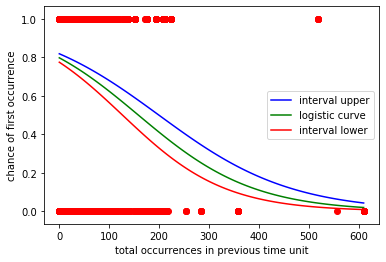

In [217]:
#Exercise 7. c)

import numpy as np

c0 = coefficients.const
c1 = coefficients.area_total_previous
print(c0, c1)
c0_upper = confidence95.iloc[0,1]
c1_upper = confidence95.iloc[1,1]
print(c0_upper, c1_upper)
c0_lower = confidence95.iloc[0,0]
c1_lower = confidence95.iloc[1,0]
print(c0_lower, c1_lower)

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

X0 = np.linspace(x.min(), x.max(), 100)
plt.scatter(df7_regression.iloc[:,0], y, c='red')

plt.plot(X0, logistic(X0*c1_upper + c0_upper), color="blue", label='interval upper')
plt.plot(X0, logistic(X0*c1 + c0), color="green", label='logistic curve')
plt.plot(X0, logistic(X0*c1_lower + c0_lower), color="red", label='interval lower')

plt.xlabel("total occurrences in previous time unit")
plt.ylabel("chance of first occurrence")
plt.legend();
plt.show()

### 1.6 Statistical significance

Now that we have performed the logistic regression, we have a way to systematically evaluate how many first occurrences to expect, given sampling density in the previous time unit.


Exercise 8. <Br>
For each European locality, calculate the expected proportion of first occurrences in the focal area surrounding the locality using the logistic regression calculated in exercise 7.<br>
Now we know for each locality how many first occurrences there are in the area around the locality and we have an estimation of how many first occurrences to expect to find there. Then, we can perform a standard statistical test to evaluate whether the observed number of first occurrences is significantly higher than what we would expect (based on the regression).



In [30]:
df8 = df7.groupby(['LIDNUM']).area_total.max().reset_index()

def logistic(x):
    return 1.0 / (1.0 + np.exp(-x))

def get_expected_proportion(val):
    c0 = coefficients.const
    c1 = coefficients.area_total_previous
    x = val*c1 + c0
    return logistic(x)
    
df8['proportion'] = get_expected_proportion(df8.area_total)
df8
#get_proportion(61)

,LIDNUM,area_total,proportion
0,20003,61,0.699237
1,20023,290,0.242470
2,20127,106,0.611596
3,20129,50,0.718880
4,20130,36,0.742717
...,...,...,...
458,28453,31,0.750902
459,28454,70,0.682599
460,28455,80,0.663550
461,28655,32,0.749279


Exercise 9. <Br>
For each European locality, calculate the probability of observing as many or more first occurrences in the focal area than what is actually found. Assume that occurrences are binomially distributed to "first occurrences" and "not first occurrences", so that the probability of a given occurrence to be a first occurrence is equal to the expected proportion of first occurrences in the focal area. 
<Br>You may use, for example, the scipy.stats.binom library (https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) for the calculations.<Br>
The above calculations give us a method to evaluate systematically, when and where the data shows an unexpectedly high amount of first occurrences, while taking into account variable sampling in space and time. Localities that show the probability of the observations to be 0.05 or less are typically thought of as statistically significant. We can look for interesting speciation patterns in space and time by plotting the localities with their significance indicated.

Exercise 10. <br>
For each time unit, plot localities on a map covering the coordinates defined in exercise 7a and indicate their significance level with a sliding color scheme. Highlight localities that have p-value less than 0.05 (i.e. probability of observations is less than 0.05).

Describe briefly the overall patterns that you observe.